In [177]:
import numpy as np
import matplotlib.pyplot as plt

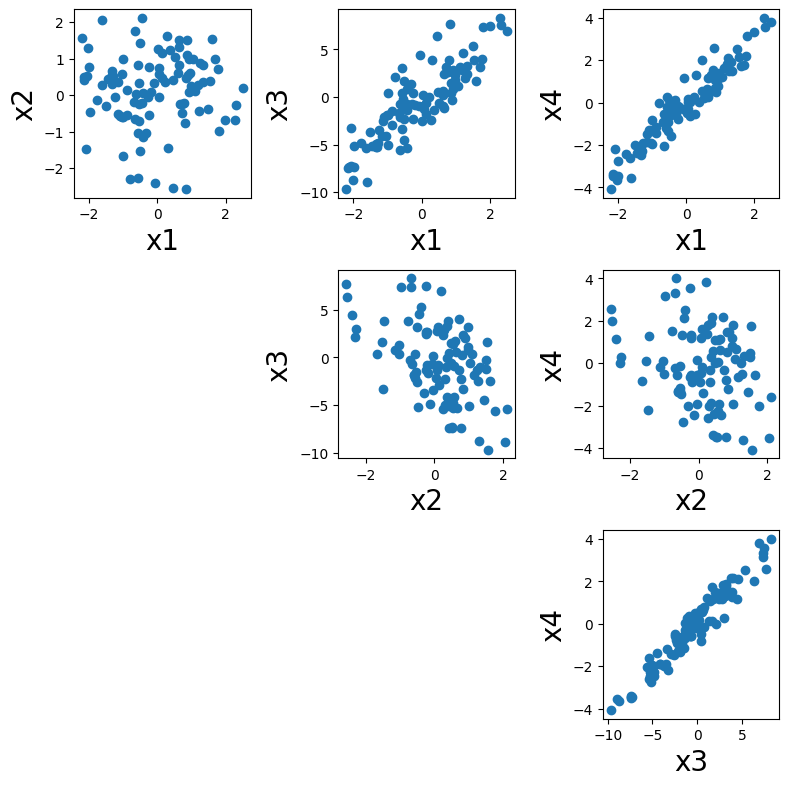

In [184]:
x = np.random.normal(0,1,(100,4))
x[:,2] = 3 * x[:,0] - 2 * x[:,1] + np.random.normal(0, 0.1, 100)
x[:,3] = 1.5 * x[:,0] - 0.5 * x[:,1] + np.random.normal(0, 0.1, 100)
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(x[:,i], x[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

In [174]:

class PCA:
    def __init__(self,k_component):
        self.mean = None
        self.k_component = k_component
        self.components = None

    def fit(self,X):
        #get mean
        self.mean = np.mean(X,axis=0)
        # print(self.mean)
        
        #centring 
        X = (X - self.mean) 
        # print(X)
        
        #calculate the covariance, here we have to give sample as columns, but in our array we have row wise arranged it
        covariance = np.cov(X,rowvar=False)
        # print(covariance)

        #get eigen value and eigen vector of covariance matrix
        e_values,e_vectors=np.linalg.eig(covariance)

        e_vectors = e_vectors.T

        # print(e_values)
        #sort the eigenvalues and eigenvectors
        idx = np.argsort(e_values)[::-1]
        # print(idx)
        e_values = e_values[idx]
        e_vectors = e_vectors[idx]

        # print(e_vectors)

        self.components = e_vectors[:self.k_component]


    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)
        
    def transform(self,X):
        X = X-self.mean
        projection =  np.dot(X,self.components.T)
        return projection
        
    


# print(x)
mypca =PCA(30)

mypca.fit(x)
mypca.transform(x)
mypca.components

array([[ 0.43565621, -0.22273172,  0.84090799, -0.23123151],
       [ 0.21749283,  0.93705635,  0.06238956, -0.26595074],
       [ 0.02184   ,  0.23639648,  0.30491641,  0.9223154 ],
       [-0.87316868,  0.12818999,  0.4427271 , -0.15854491]])

In [176]:
#Checking with sklearn version
from sklearn.decomposition import PCA
pca =PCA(n_components=4)
pca.fit(x)
pca.transform(x)
pca.components_

array([[ 0.43565621, -0.22273172,  0.84090799, -0.23123151],
       [ 0.21749283,  0.93705635,  0.06238956, -0.26595074],
       [ 0.02184   ,  0.23639648,  0.30491641,  0.9223154 ],
       [ 0.87316868, -0.12818999, -0.4427271 ,  0.15854491]])